# Installs and Imports

In [0]:
# install dependencies:
# (use +cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.4+cu100 in /usr/local/lib/python3.6/dist-packages (1.4.0+cu100)
Requirement already up-to-date: torchvision==0.5+cu100 in /usr/local/lib/python3.6/dist-packages (0.5.0+cu100)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-e_k7ca21
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-e_k7ca21
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275251 sha256=8f1d26b08750ad5ab9965d19296aa40fee01c32934384f484e9b7cfdb9c9f268
  Stored in directory: /tmp/pip-ephem-wheel-cache-hvc1ic_q/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0
gcc (Ubuntu 7.4.0-1ubuntu1~18.04.1) 7.4.0
Copyright (C) 2017 Free Software

In [0]:
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/detectron2_repo
  Found existing installation: detectron2 0.1
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import math

import cv2
import os
import numpy as np
import json
from detectron2.structures import BoxMode

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Directories

In [0]:
trainDirectory = "/content/drive/My Drive/sharkdata/initial/images/train/"
valDirectory = "/content/drive/My Drive/sharkdata/initial/images/val/"
imageDirectory = "/content/drive/My Drive/sharkdata/initial/images/train/"
sourceJsonDirectory = "/content/drive/My Drive/sharkdata/initial/data.json"
baseDirectory = "/content/drive/My Drive/sharkdata/initial/"


# trainDirectory = "/content/drive/My Drive/sharkdata/initial/masks/train/"
# valDirectory = "/content/drive/My Drive/sharkdata/initial/masks/val/"
# imageDirectory = "/content/drive/My Drive/sharkdata/initial/masks/train/"

# Dataset

Construct Dictionary of SharkIDs to Classes

In [0]:
def createSharkClassID(filename):
  json_file = filename

  SharkClassDictionary = {}

  # Open the file
  with open(json_file) as f:
    img_annotations = json.load(f)

  classID = 0
  for i, values in enumerate(img_annotations):
    # Get the sharkID out
    sharkID   = values["id"]

    # If the current sharkID has not been assigned a classID
    if(sharkID not in SharkClassDictionary):
      # Add the sharkID to the dictionary, giving it a classID
      SharkClassDictionary[sharkID] = classID
      # Increment the classID for the next sharkID
      classID = classID + 1

  return SharkClassDictionary

# Generate dictionary
# SharkClassDictionary = createSharkClassID("data/train/data.json")
SharkClassDictionary = createSharkClassID(sourceJsonDirectory)
# print(SharkClassDictionary)
torch.save(SharkClassDictionary,baseDirectory+"SharkClassDictionary.pt")

{'R-1008': 0, 'R-1005': 1, 'R-1007': 2, 'R-1014': 3, 'R-1004': 4, 'R-1053': 5, 'R-1039': 6, 'R-1018': 7, 'R-1029': 8, 'R-1038': 9, 'R-1012': 10, 'R-1045': 11, 'R-1028': 12, 'R-1046': 13, 'R-1047': 14, 'R-1022': 15, 'R-1021': 16, 'R-1056': 17, 'R-1058': 18, 'R-1137': 19, 'R-1064': 20, 'R-1070': 21, 'R-1020': 22, 'R-1002': 23, 'R-1066': 24, 'R-1010': 25, 'R-1067': 26, 'R-1001': 27, 'R-1209': 28, 'R-1230': 29, 'R-1305': 30, 'R-1096': 31, 'R-1068': 32, 'R-1304': 33, 'R-1158': 34, 'R-1303': 35, 'R-1184': 36, 'R-1294': 37, 'R-1289': 38, 'R-1327': 39, 'R-1049': 40, 'R-1188': 41, 'R-1182': 42, 'R-1257': 43, 'R-1156': 44, 'R-1278': 45, 'R-1333': 46, 'R-1210': 47, 'R-1099': 48, 'R-1270': 49, 'R-1292': 50, 'R-1109': 51, 'R-1190': 52, 'R-1194': 53, 'R-1275': 54, 'R-1241': 55, 'R-1195': 56, 'R-1203': 57, 'R-1329': 58, 'R-1279': 59, 'R-1136': 60, 'R-1341': 61, 'R-1035': 62, 'R-1166': 63, 'R-1273': 64, 'R-1027': 65, 'R-1215': 66, 'R-1343': 67, 'R-1342': 68, 'R-1059': 69, 'R-1115': 70, 'R-1155': 71, '

Create Class List

In [0]:
ClassList = [""] * len(SharkClassDictionary)
for sharkID in list(SharkClassDictionary):
  ClassList[SharkClassDictionary[sharkID]] = sharkID

# print(ClassList)
torch.save(ClassList,baseDirectory+"ClassList.pt")

['R-1008', 'R-1005', 'R-1007', 'R-1014', 'R-1004', 'R-1053', 'R-1039', 'R-1018', 'R-1029', 'R-1038', 'R-1012', 'R-1045', 'R-1028', 'R-1046', 'R-1047', 'R-1022', 'R-1021', 'R-1056', 'R-1058', 'R-1137', 'R-1064', 'R-1070', 'R-1020', 'R-1002', 'R-1066', 'R-1010', 'R-1067', 'R-1001', 'R-1209', 'R-1230', 'R-1305', 'R-1096', 'R-1068', 'R-1304', 'R-1158', 'R-1303', 'R-1184', 'R-1294', 'R-1289', 'R-1327', 'R-1049', 'R-1188', 'R-1182', 'R-1257', 'R-1156', 'R-1278', 'R-1333', 'R-1210', 'R-1099', 'R-1270', 'R-1292', 'R-1109', 'R-1190', 'R-1194', 'R-1275', 'R-1241', 'R-1195', 'R-1203', 'R-1329', 'R-1279', 'R-1136', 'R-1341', 'R-1035', 'R-1166', 'R-1273', 'R-1027', 'R-1215', 'R-1343', 'R-1342', 'R-1059', 'R-1115', 'R-1155', 'R-1293', 'R-1296', 'R-1213', 'R-1344', 'R-1207', 'R-1345', 'R-1161', 'R-1117', 'R-1291', 'R-1153', 'R-1316', 'R-1272', 'R-1337', 'R-1308', 'R-1350', 'R-1348', 'R-1355', 'R-1358', 'R-1347', 'R-1060', 'R-1362', 'R-1361', 'R-1321', 'R-1364', 'R-1299', 'R-1368', 'R-1371', 'R-1248',

Registering the shark data with detectron2

In [0]:
# Construct the shark dictionaries
# This function will return the items in our dataset
def constructSharkDicts(dataDirectory):
  print("Constructing shark dicts")

  # Find the json file in our file structure
  json_file = os.path.join(dataDirectory, "data.json")

  # Open the file, referring to it as f
  with open(json_file) as f:
    # Get the image annotations out using json to read the file containin the JSON object
    img_annotations = json.load(f)

  # List of dictionaries
  dataset_dicts = []
  
  # Loop over the image annotation values, using idx as the indexer and v to be the value
  for i, values in enumerate(img_annotations):
    # Print every 100 iteration for time tracking
    if(i % 100 == 0): print(i)

    # if(i == 5000): break

    # Create empty record
    record = {}

    # Extract information from json file
    imageID   = values["imId"]
    # filename  = dataDirectory + values["imId"] +".jpg"
    filename = imageDirectory + values["imId"] +".jpg"
    # filename = imageDirectory + values["imId"] +".png"
    sharkID   = values["id"]
    sharkSide = values["side"]

    # No bounding box given: use triangle
    keypoints = values["keypoints"]
    tip_yx = keypoints["tip_yx"]
    leading_yx = keypoints["leading_yx"]
    trailing_yx = keypoints["trailing_yx"]

    # Create segmentation polygon
    poly = [tip_yx[1],tip_yx[0], leading_yx[1],leading_yx[0], trailing_yx[1],trailing_yx[0]]

    # Get the bounding box dimensions
    xs = [tip_yx[1], leading_yx[1], trailing_yx[1]]
    ys = [tip_yx[0], leading_yx[0], trailing_yx[0]]
    xmax = (max(xs) + 5)
    ymax = (max(ys) + 5)
    xmin = (min(xs) - 5)
    ymin = (min(ys) - 5)

    # ymin, xmin, ymax, xmax = values["box_ymin_xmin_ymax_xmax"]

    # Check image exists (might not because of how I'm handling dataset)
    if(not os.path.isfile(filename)): continue

    # Get image height and width
    imHeight, imWidth = cv2.imread(filename).shape[:2]

    # Construct annotation object (bounding box)
    objs = []
    
    #Get ClassID from SharkID
    classID = SharkClassDictionary[sharkID]

    # Construct an annotation object (only one in this case)
    obj = \
    {
        "bbox": [xmin,ymin,xmax,ymax],
        "bbox_mode": BoxMode.XYXY_ABS,
        # "sementation": [poly],
        "category_id": classID, #this needs to be an INTEGER ID for the shark's category, so we have created a mapping from sharkIDs to classIDs
        "iscrowd": 0
    }
    objs.append(obj)

    # Populate record
    record["file_name"] = filename
    record["image_id"]  = imageID
    record["height"]    = imHeight
    record["width"]     = imWidth
    record["annotations"] = objs

    # Append this record to the list of dictionaries
    dataset_dicts.append(record)
    
    # Only do it for 3 images (time saving)
    # print()
    # if i == 2:
      # break

  # Return the list of dictionaries
  return dataset_dicts

tmpDict = constructSharkDicts(trainDirectory)#"/content/drive/My Drive/sharkdata/initial/images/train/")
# torch.save(tmpDict,"/content/drive/My Drive/sharkdata/initial/images/sharkTrainDicts.pt")
torch.save(tmpDict,trainDirectory+"/sharkTrainDicts.pt")

# tmpDict = constructSharkDicts("/content/drive/My Drive/sharkdata/initial/images/val/")
tmpDict = constructSharkDicts(valDirectory)
# torch.save(tmpDict,"/content/drive/My Drive/sharkdata/initial/images/sharkValDicts.pt")
torch.save(tmpDict,valDirectory+"/sharkValDicts.pt")

Constructing shark dicts
0
100
200
300
400
500
600
700
800
900
Constructing shark dicts
0
100


In [0]:
# Registered in dataset loading
def getSharkDicts(trainVal):
  if(trainVal == "train"):
    print("Getting shark train dicts")
    return getSharkTrainDicts()
  if(trainVal == "val"):
    print("Getting shark val dicts")
    return getSharkValDicts()

# Called by getSharkDicts
def getSharkTrainDicts():
  return torch.load(trainDirectory+"sharkTrainDicts.pt")

# Called by getSharkDicts
def getSharkValDicts():
  return torch.load(valDirectory+"sharkValDicts.pt")

def getSharkClassDictionary():
  return torch.load(baseDirectory+"SharkClassDictionary.pt")

def getClassList():
  return torch.load(baseDirectory+"ClassList.pt")


SharkClassDictionary = getSharkClassDictionary()
ClassList = getClassList()

In [0]:
# Enter into dataset and metadata catalogues
from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ["train", "val"]:
  # Register shark_train and shark_val
  DatasetCatalog.register("shark_" + d, lambda d=d: getSharkDicts(d))
  MetadataCatalog.get("shark_" + d).set(thing_classes=ClassList)

shark_metadata = MetadataCatalog.get("shark_train")

AssertionError: ignored

Visualise to check this worked




R-1213
/content/drive/My Drive/sharkdata/initial/images/train/26ac158e-7350-4b64-ad45-311e9eff1717.jpg


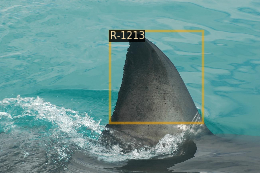

[549, 158, 1016, 617]
467 459


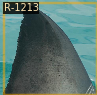


R-1049
/content/drive/My Drive/sharkdata/initial/images/train/5ead7292-07c6-42d4-85e7-4008f0753a42.jpg


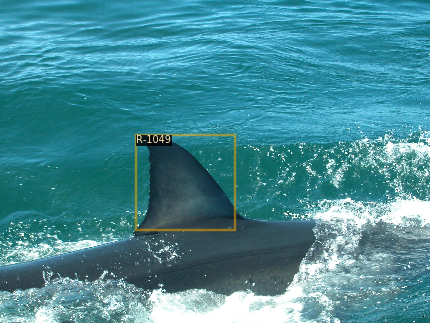

[682, 678, 1174, 1151]
492 473


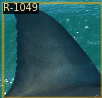


R-1195
/content/drive/My Drive/sharkdata/initial/images/train/44fb0518-2eb8-40eb-874c-2dd37fc752d3.jpg


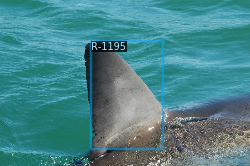

[457, 210, 815, 746]
358 536


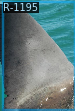


R-1341
/content/drive/My Drive/sharkdata/initial/images/train/2003bcaa-6113-4cd6-b8ec-94ecfc998c9d.jpg


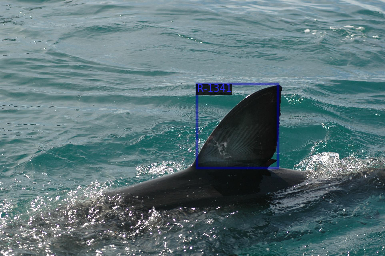

[983, 423, 1392, 842]
409 419


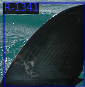


R-1002
/content/drive/My Drive/sharkdata/initial/images/train/898d08c1-eb41-4564-9b11-98d1e003698f.jpg


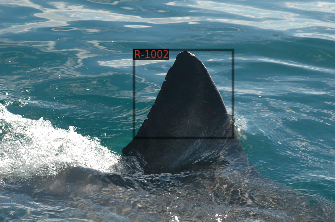

[668, 253, 1165, 693]
497 440


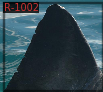


R-1352
/content/drive/My Drive/sharkdata/initial/images/train/a0d04280-b9be-4e98-a999-faf50368cac2.jpg


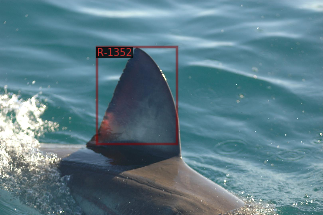

[484, 239, 887, 723]
403 484


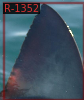


R-1361
/content/drive/My Drive/sharkdata/initial/images/train/5e784bf5-e6e1-4352-a386-1c0470096538.jpg


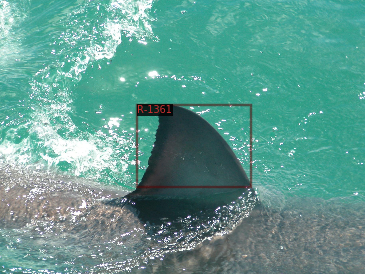

[687, 527, 1256, 938]
569 411


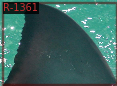


R-1299
/content/drive/My Drive/sharkdata/initial/images/train/055b7c5f-f0c9-46bf-91c4-10a87e08ff4b.jpg


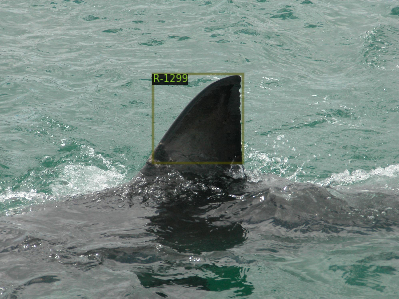

[763, 373, 1216, 817]
453 444


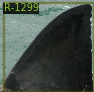


R-1096
/content/drive/My Drive/sharkdata/initial/images/train/80cf4158-cb89-4068-b1c8-eb34a55f9d19.jpg


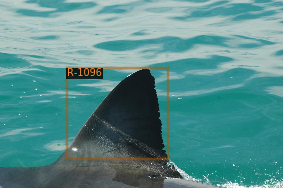

[335, 343, 842, 798]
507 455


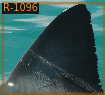


R-1099
/content/drive/My Drive/sharkdata/initial/images/train/eae8b629-6e0c-4a5d-a0fa-b32b4859e6da.jpg


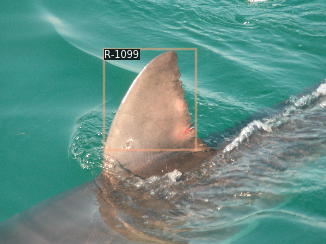

[522, 250, 978, 753]
456 503


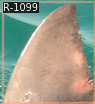


R-1045
/content/drive/My Drive/sharkdata/initial/images/train/fcc439a1-066b-4200-8d5b-43c697db2573.jpg


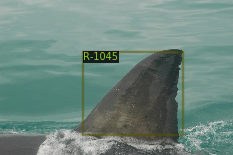

[416, 260, 917, 677]
501 417


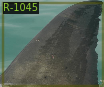


R-1029
/content/drive/My Drive/sharkdata/initial/images/train/4676427d-3df6-4256-ac78-f8a34366a1d1.jpg


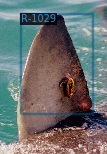

[105, 71, 463, 568]
358 497


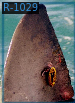

In [0]:
# dataset_dicts = getSharkDicts("/content/drive/My Drive/sharkdata/train")
dataset_dicts = getSharkTrainDicts() #getSharkDicts("/content/drive/My Drive/sharkdata/all_data/train")
# dataset_dicts = getSharkValDicts()
# print("Done")
for dictionary in random.sample(dataset_dicts, 12):
# for dictionary in dataset_dicts:
  scl = 0.2
  img = cv2.imread(dictionary["file_name"])
  visualizer = Visualizer(img[:, :, ::-1], metadata=shark_metadata, scale=scl)
  vis = visualizer.draw_dataset_dict(dictionary)
  # Print the class ID
  classID = ((dictionary["annotations"])[0])["category_id"]
  print()
  print(ClassList[classID])
  print(dictionary["file_name"])

  cv2_imshow(vis.get_image()[:, :, ::-1])

  #crop
  bbox = ((dictionary["annotations"])[0])["bbox"]
  print(bbox) #"bbox": [xmin,ymin,xmax,ymax],
  xmin,ymin,xmax,ymax = bbox
  w = xmax-xmin
  h = ymax-ymin
  print(w,h)
  # cropT = detectron2.data.transforms.CropTransform(xmin-5,ymin-5,w+5,h+5)
  cropT = detectron2.data.transforms.CropTransform(math.floor((xmin-15)*scl),math.floor((ymin-15)*scl),math.floor((w+20)*scl),math.floor((h+20)*scl))
  cropIm = cropT.apply_image(vis.get_image()[:, :, ::-1])
  cv2_imshow(cropIm)

  # break

# Dataset Mapping

In [0]:
# Building my own data loader
from detectron2.data import build_detection_train_loader
from detectron2.data import transforms as T
from detectron2.data import detection_utils as utils
import copy

def mapper(dataset_dict):
  # Implement a mapper, similar to the default DatasetMapper, but with your own customizations
  # Create a copy of the dataset dict
  dataset_dict = copy.deepcopy(dataset_dict)  # it will be modified by code below
  # Read in the image
  image = utils.read_image(dataset_dict["file_name"], format="BGR")

  # cropping
  # Get boundingbox
  bbox = ((dataset_dict["annotations"])[0])["bbox"]
  # print(bbox)
  xmin,ymin,xmax,ymax = bbox
  w = xmax-xmin
  h = ymax-ymin

  # print(image.shape)

  cropT = T.CropTransform(xmin-15,ymin-15,w+20,h+20)
  image = cropT.apply_image(image)

  dataset_dict["height"] = h+15+20
  dataset_dict["width"] = w+15+20
  # cv2_imshow(image)

  # image, transforms = T.apply_transform_gens([cropT], image)

  # print()
  # print(T.Resize((800, 800)).dtype)
  # print()

  # T.Transform()

  # print(cropIm.shape)

  # image, transforms = T.apply_transform_gens([T.Resize((800, 800))], image)
  # image, transforms = T.apply_transform_gens([T.CropTransform(math.floor((xmin-2)),math.floor((ymin-2)),math.floor((w+5)),math.floor((h+5)))], image)
  # image, transforms = T.apply_transform_gens([utils.gen_crop_transform_with_instance((h,w), (dataset_dict["height"],dataset_dict["width"]), (dataset_dict["annotations"])[0]  )], image)
  # gen_crop_transform_with_instance((h,w), (dataset_dict["height"],dataset_dict["width"]), dataset_dict)
  # print(image.size)
  transforms = T.TransformList([cropT])

  
  # image, tfms = T.apply_transform_gens([T.ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), T.RandomFlip()], image)
  # image, tfms = T.apply_transform_gens([T.RandomFlip()], image)
  image, tfms = T.apply_transform_gens([], image)
  transforms = transforms + tfms

  # print(image.shape)

  # print(image.shape)
  dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1).astype("float32"))

  # cv2_imshow(image)

  annos = \
  [
      utils.transform_instance_annotations(obj, transforms, image.shape[:2])
      for obj in dataset_dict.pop("annotations")
      if obj.get("iscrowd", 0) == 0
  ]
  instances = utils.annotations_to_instances(annos, image.shape[:2])
  dataset_dict["instances"] = utils.filter_empty_instances(instances)

  return dataset_dict

# data_loader = build_detection_train_loader(cfg, mapper=mapper)
# use this dataloader instead of the default

# temp = getSharkTrainDicts()
# for i in range(0,100):
  # mapper(temp[i])


In [0]:
# from detectron2.data import build_detection_train_loader
# from detectron2.data import transforms as T
# from detectron2.data import detection_utils as utils
# import copy

# def mapper(dataset_dict):
#   dataset_dict = copy.deepcopy(dataset_dict)  # it will be modified by code below
#   # USER: Write your own image loading if it's not from a file
#   image = utils.read_image(dataset_dict["file_name"], format=self.img_format)
#   utils.check_image_size(dataset_dict, image)

#       # Crop around an instance if there are instances in the image.
#       # USER: Remove if you don't use cropping
#       # if self.crop_gen:
#           # crop_tfm = utils.gen_crop_transform_with_instance(
#           #     self.crop_gen.get_crop_size(image.shape[:2]),
#           #     image.shape[:2],
#           #     np.random.choice(dataset_dict["annotations"]),
#           # )

#   bbox = ((dataset_dict["annotations"])[0])["bbox"]
#   xmin,ymin,xmax,ymax = bbox
#   w = xmax-xmin
#   h = ymax-ymin

#   crop_tfm = T.CropTransform(math.floor((xmin-2)),math.floor((ymin-2)),math.floor((w+5)),math.floor((h+5)))
#   image = crop_tfm.apply_image(image)
#   image, transforms = T.apply_transform_gens(self.tfm_gens, image)
#       # if self.crop_gen:
#   transforms = crop_tfm + transforms

#   image_shape = image.shape[:2]  # h, w

#   # Pytorch's dataloader is efficient on torch.Tensor due to shared-memory,
#   # but not efficient on large generic data structures due to the use of pickle & mp.Queue.
#   # Therefore it's important to use torch.Tensor.
#   dataset_dict["image"] = torch.as_tensor(
#       image.transpose(2, 0, 1).astype("float32")
#   ).contiguous()
#   # Can use uint8 if it turns out to be slow some day

#   # USER: Remove if you don't use pre-computed proposals.
#   if self.load_proposals:
#       utils.transform_proposals(
#           dataset_dict, image_shape, transforms, self.min_box_side_len, self.proposal_topk
#       )

#   if not self.is_train:
#       dataset_dict.pop("annotations", None)
#       dataset_dict.pop("sem_seg_file_name", None)
#       return dataset_dict

#   if "annotations" in dataset_dict:
#       # USER: Modify this if you want to keep them for some reason.
#       for anno in dataset_dict["annotations"]:
#           if not self.mask_on:
#               anno.pop("segmentation", None)
#           if not self.keypoint_on:
#               anno.pop("keypoints", None)

#       # USER: Implement additional transformations if you have other types of data
#       annos = [
#           utils.transform_instance_annotations(
#               obj, transforms, image_shape, keypoint_hflip_indices=self.keypoint_hflip_indices
#           )
#           for obj in dataset_dict.pop("annotations")
#           if obj.get("iscrowd", 0) == 0
#       ]
#       instances = utils.annotations_to_instances(
#           annos, image_shape, mask_format=self.mask_format
#       )
#       # Create a tight bounding box from masks, useful when image is cropped
#       if self.crop_gen and instances.has("gt_masks"):
#           instances.gt_boxes = instances.gt_masks.get_bounding_boxes()
#       dataset_dict["instances"] = utils.filter_empty_instances(instances)

#   return dataset_dict


In [0]:
from detectron2.engine import DefaultTrainer

class Trainer(DefaultTrainer):
    # @classmethod
    # def build_evaluator(cls, cfg, dataset_name):
    #     output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
    #     evaluators = [COCOEvaluator(dataset_name, cfg, True, output_folder)]
    #     if cfg.MODEL.DENSEPOSE_ON:
    #         evaluators.append(DensePoseCOCOEvaluator(dataset_name, True, output_folder))
    #     return DatasetEvaluators(evaluators)

    # @classmethod
    # def build_test_loader(cls, cfg, dataset_name):
    #     return build_detection_test_loader(cfg, dataset_name, mapper=mapper)

    @classmethod
    def build_train_loader(cls, cfg):
        return build_detection_train_loader(cfg, mapper=mapper)


# Training

In [0]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import shutil

# COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml
# COCO-Detection/faster_rcnn_R_50_C4_1x.yaml
# COCO-Detection/retinanet_R_50_FPN_1x.yaml
# COCO-Detection/retinanet_R_50_FPN_3x.yaml
# COCO-Detection/retinanet_R_101_FPN_3x.yaml
modelLink = "COCO-Detection/retinanet_R_50_FPN_1x.yaml"
# modelLink = "COCO-Detection/faster_rcnn_R_50_C4_1x.yaml"

# default configuration
cfg = get_cfg()

# get the pretrained retinanet model
cfg.merge_from_file(model_zoo.get_config_file(modelLink))
# cfg.merge_from_file(model_zoo.get(modelLink,trained=False))

# list of the dataset names for training (registered in datasetcatalog (?))
cfg.DATASETS.TRAIN = ("shark_train",)
# list of the dataset names for testing (registered in datasetcatalog (?))
cfg.DATASETS.TEST = ()

##cropping
# cfg.INPUT.CROP({"ENABLED": False})
# cfg.INPUT.CROP.ENABLED = True
##

# number of data loading threads
cfg.DATALOADER.NUM_WORKERS = 2

# locate the pretrained weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(modelLink)  # Let training initialize from model zoo
# cfg.MODEL.WEIGHTS = ""#model_zoo.get_checkpoint_url(modelLink)  # Let training initialize from model zoo

# number of images per batch
cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.SOLVER.IMS_PER_BATCH = 16

# learning rate
cfg.SOLVER.BASE_LR = 0.000025  # pick a good LR
# cfg.SOLVER.BASE_LR = 0.0025  # pick a good LR
# cfg.SOLVER.BASE_LR = 0.001  # pick a good LR

# max iterations
# cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.SOLVER.MAX_ITER = 50000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset

# Minibatch size PER image - number of regions of interest (ROIs)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # faster, and good enough for this toy dataset (default: 512)
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)

# Number of classes
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(SharkClassDictionary)  # only has one class (ballon)
cfg.MODEL.RETINANET.NUM_CLASSES = len(SharkClassDictionary)  # only has one class (ballon)

# directories (?)
# Clear output directory
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
filesInOutput = os.listdir(cfg.OUTPUT_DIR)
for file in filesInOutput:
  if(file != ".ipynb_checkpoints"):
    os.remove(cfg.OUTPUT_DIR+"/"+file)

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Get the default trainer:
## 1) Create model, optimiser, scheduler, dataloader from the given config
## 2) Load a checkpoint or cfg.MODEL.WEIGHTS if it exists
## 3) Register a few common hooks (?)
## This simplifies the standard model training workflow, so you don't have to write boilerplate code
# trainer = DefaultTrainer(cfg)
trainer = Trainer(cfg)

# data_loader = build_detection_train_loader(cfg, mapper=mapper)
# trainer.build_train_loader = data_loader

# If true, and the last checkpoint exists, resume from it
# If false, load a model specified by the config
trainer.resume_or_load(resume=False)
trainer.train()

Loading config /content/detectron2_repo/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[02/01 01:38:33 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

'head.cls_score.weight' has shape (720, 256, 3, 3) in the checkpoint but (1089, 256, 3, 3) in the model! Skipped.
'head.cls_score.bias' has shape (720,) in the checkpoint but (1089,) in the model! Skipped.


[02/01 01:38:34 d2.engine.train_loop]: Starting training from iteration 0
[02/01 01:38:40 d2.utils.events]: eta: 3:15:10  iter: 19  total_loss: 1.497  loss_cls: 1.472  loss_box_reg: 0.033  time: 0.2928  data_time: 0.0193  lr: 0.000000  max_mem: 9029M
[02/01 01:38:45 d2.utils.events]: eta: 3:22:23  iter: 39  total_loss: 1.499  loss_cls: 1.473  loss_box_reg: 0.018  time: 0.2785  data_time: 0.0092  lr: 0.000001  max_mem: 9029M
[02/01 01:38:51 d2.utils.events]: eta: 3:28:46  iter: 59  total_loss: 1.507  loss_cls: 1.476  loss_box_reg: 0.029  time: 0.2861  data_time: 0.0113  lr: 0.000001  max_mem: 9029M
[02/01 01:38:56 d2.utils.events]: eta: 3:23:12  iter: 79  total_loss: 1.480  loss_cls: 1.465  loss_box_reg: 0.017  time: 0.2750  data_time: 0.0071  lr: 0.000002  max_mem: 9029M
[02/01 01:39:01 d2.utils.events]: eta: 3:20:58  iter: 99  total_loss: 1.426  loss_cls: 1.408  loss_box_reg: 0.015  time: 0.2704  data_time: 0.0074  lr: 0.000002  max_mem: 9029M
[02/01 01:39:06 d2.utils.events]: eta: 3:

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


[02/01 01:39:31 d2.utils.events]: eta: 3:08:27  iter: 219  total_loss: 1.383  loss_cls: 1.367  loss_box_reg: 0.018  time: 0.2616  data_time: 0.0123  lr: 0.000005  max_mem: 9029M
[02/01 01:39:38 d2.utils.events]: eta: 3:08:03  iter: 239  total_loss: 1.386  loss_cls: 1.373  loss_box_reg: 0.015  time: 0.2678  data_time: 0.0122  lr: 0.000006  max_mem: 9036M
[02/01 01:39:44 d2.utils.events]: eta: 3:08:18  iter: 259  total_loss: 1.363  loss_cls: 1.344  loss_box_reg: 0.015  time: 0.2689  data_time: 0.0076  lr: 0.000006  max_mem: 9036M
[02/01 01:39:50 d2.utils.events]: eta: 3:09:55  iter: 279  total_loss: 1.361  loss_cls: 1.351  loss_box_reg: 0.013  time: 0.2704  data_time: 0.0082  lr: 0.000007  max_mem: 9036M
[02/01 01:39:55 d2.utils.events]: eta: 3:08:42  iter: 299  total_loss: 1.358  loss_cls: 1.349  loss_box_reg: 0.013  time: 0.2707  data_time: 0.0139  lr: 0.000007  max_mem: 9668M
[02/01 01:40:00 d2.utils.events]: eta: 3:10:53  iter: 319  total_loss: 1.352  loss_cls: 1.339  loss_box_reg: 0

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


[02/01 01:43:59 d2.utils.events]: eta: 3:16:34  iter: 1179  total_loss: 1.261  loss_cls: 1.254  loss_box_reg: 0.006  time: 0.2751  data_time: 0.0083  lr: 0.000025  max_mem: 9668M
[02/01 01:44:04 d2.utils.events]: eta: 3:16:48  iter: 1199  total_loss: 1.264  loss_cls: 1.259  loss_box_reg: 0.006  time: 0.2746  data_time: 0.0101  lr: 0.000025  max_mem: 9668M
[02/01 01:44:09 d2.utils.events]: eta: 3:16:43  iter: 1219  total_loss: 1.239  loss_cls: 1.233  loss_box_reg: 0.006  time: 0.2740  data_time: 0.0088  lr: 0.000025  max_mem: 9668M
[02/01 01:44:14 d2.utils.events]: eta: 3:16:26  iter: 1239  total_loss: 1.239  loss_cls: 1.233  loss_box_reg: 0.006  time: 0.2738  data_time: 0.0071  lr: 0.000025  max_mem: 9668M
[02/01 01:44:19 d2.utils.events]: eta: 3:15:46  iter: 1259  total_loss: 1.253  loss_cls: 1.248  loss_box_reg: 0.006  time: 0.2733  data_time: 0.0075  lr: 0.000025  max_mem: 9668M
[02/01 01:44:24 d2.utils.events]: eta: 3:15:42  iter: 1279  total_loss: 1.265  loss_cls: 1.261  loss_box_

In [0]:
# Look at training curves in tensorboard:
# !kill 1825
%load_ext tensorboard
%tensorboard --logdir output

# Inference and Evaluation

In [0]:
# Inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set the testing threshold for this model
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.1
# cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.25
cfg.DATASETS.TEST = ("shark_val", )
# cfg.DATASETS.TEST = ("shark_train", )
# Create a simple end-to-end predictor with the given config
## This predictor takes care of model loading and input preprocessing for you
predictor = DefaultPredictor(cfg)

In [0]:
# Visualise:
# from detectron2.utils.visualizer import ColorMode
# dataset_dicts = getSharkTrainDicts()
dataset_dicts = getSharkValDicts() #getSharkDicts("/content/drive/My Drive/sharkdata/all_data/val")
# for dictionary in random.sample(dataset_dicts, 12):
for dictionary in random.sample(dataset_dicts, 12):
  im = cv2.imread(dictionary["file_name"])
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                  metadata=shark_metadata, 
                  scale=0.1,
                #  instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
  )

  classID = ((dictionary["annotations"])[0])["category_id"]
  sharkID = ClassList[classID]

  instances = outputs["instances"]
  classes = instances.get("pred_classes")
  sharkIDs = []
  for c in classes:
    sharkIDs.append(ClassList[c])
  # print(sharkIDs)
  scoresRaw = instances.get("scores")
  scores = []
  for s in scoresRaw:
    # sStr = str(s.item())
    # sStr = sStr[:4]
    s = s.item()
    s = round(s,2)
    scores.append(s)
  out = dict(zip(sharkIDs,scores))
  print(out)

  highestScoringClass = ""
  highestScore = 0.0
  for s in out:
    floatS = float(out[s])
    if(floatS > highestScore): 
      highestScore = floatS
      highestScoringClass = out

  if(sharkID in out):
    if(highestScoringClass == sharkID):
      print("Correct prediction, and highest predicted: ", sharkID, out[sharkID])
    else:
      print("Correct prediction: ", sharkID, out[sharkID])
  else:
    print("No prediction: ", sharkID, "0.00")

  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  

  img = v.get_image()[:, :, ::-1]
  cv2_imshow(img)

  # filename = "/content/inferenceOutputs" + sharkID + "_" + dictionary["file_name"]
  # cv2.imwrite(filename, img)

# {'instances': Instances(num_instances=5, image_height=1146, image_width=1527, fields=[pred_boxes = Boxes(tensor([[415.7755, 205.5060, 901.9624, 744.4304],
#         [415.2069, 206.6793, 900.0170, 735.9542],
#         [412.1781, 210.1250, 897.9131, 760.2349],
#         [415.7755, 205.5060, 901.9624, 744.4304],
#         [412.1781, 210.1250, 897.9131, 760.2349]], device='cuda:0')), 
#         scores = tensor([0.2891, 0.2503, 0.2174, 0.2118, 0.2084], device='cuda:0'), 
#         pred_classes = tensor([110,  56,  74, 111,  97], device='cuda:0'), ])
# }

In [0]:
# AP
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("shark_val", cfg, False, output_dir="./output/")
# evaluator = COCOEvaluator("shark_train", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "shark_val")
# val_loader = build_detection_test_loader(cfg, "shark_train")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test